In this notebook, I have conducted a comprehensive analysis of a specific dataset using various machine learning algorithms.              Performance metrics were computed for each model to evaluate their effectiveness and accuracy.

Uploading ,Scaling Reshaping and spliting the data into train and test sets

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.preprocessing import StandardScaler

# Upload the dataset file
uploaded = files.upload()


# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Separate features (X) and target (y)
X = data.drop('strength', axis=1)  # Adjust 'target_column_name' to your target column name
y = data['strength']

scaler = StandardScaler()

# Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the scaled features, and y contains the target values
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)

# Define desired input size and number of channels
desired_size = 75
num_channels = 3

# Calculate the number of repeats needed to match the desired size
num_repeats = desired_size * desired_size * num_channels // X_scaled.shape[1]

# Reshape and upsample the scaled input data to match the desired shape
X_reshaped = np.repeat(X_scaled[:, np.newaxis, :], num_repeats, axis=1)
X_reshaped = X_reshaped.reshape(X_scaled.shape[0], desired_size, desired_size, num_channels)

print("Shape of X_reshaped:", X_reshaped.shape)

from sklearn.model_selection import train_test_split

# Split the reshaped and scaled data into training and testing sets
X_train_final, X_test_final, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42
)

print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_test_final:", X_test_final.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Saving concrete_dataset_without_class.csv to concrete_dataset_without_class (1).csv
Shape of X_scaled: (1030, 5)
Shape of y: (1030,)
Shape of X_reshaped: (1030, 75, 75, 3)
Shape of X_train_final: (824, 75, 75, 3)
Shape of X_test_final: (206, 75, 75, 3)
Shape of y_train: (824,)
Shape of y_test: (206,)


DecisionTreeClassifier

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Load the uploaded CSV dataset into a Pandas DataFrame
# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Convert continuous target variable into categorical
data['Aggregated Score'] = pd.cut(data['Aggregated Score'], bins=3, labels=['Low', 'Medium', 'High'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Aggregated Score', axis=1)
y = data['Aggregated Score']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Saving modified_dataset.csv to modified_dataset (2).csv
Accuracy: 0.9902912621359223
Precision: 0.9904517371419401
F1 Score: 0.9902188229096109
Confusion Matrix:
[[ 43   0   0]
 [  0  42   2]
 [  0   0 119]]


Random Forest Classifier


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Load the uploaded CSV dataset into a Pandas DataFrame
# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Convert continuous target variable into categorical (if needed)
data['Aggregated Score'] = pd.cut(data['Aggregated Score'], bins=3, labels=['Low', 'Medium', 'High'])
# data['Aggregated Score'] = pd.cut(data['Aggregated Score'], bins=3, labels=['Low', 'Medium', 'High'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Aggregated Score', axis=1)
y = data['Aggregated Score']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Saving modified_dataset.csv to modified_dataset (4).csv
Accuracy: 0.9951456310679612
Precision: 0.9951860841423947
F1 Score: 0.9951278879794778
Confusion Matrix:
[[ 43   0   0]
 [  0  43   1]
 [  0   0 119]]


SVM

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Load the uploaded CSV dataset into a Pandas DataFrame
# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Convert continuous target variable into categorical (if needed)

data['Aggregated Score'] = pd.cut(data['Aggregated Score'], bins=3, labels=['Low', 'Medium', 'High'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Aggregated Score', axis=1)
y = data['Aggregated Score']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors (kNN) Classifier
clf = KNeighborsClassifier()

# Train the kNN Classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Saving modified_dataset.csv to modified_dataset (5).csv
Accuracy: 0.970873786407767
Precision: 0.9722718446601942
F1 Score: 0.9706539945279401
Confusion Matrix:
[[ 41   0   2]
 [  0  40   4]
 [  0   0 119]]


K-Neural Networks

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Load the uploaded CSV dataset into a Pandas DataFrame
# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Manually encode categorical target variable into numeric
class_mapping = {class_label: idx for idx, class_label in enumerate(data['Aggregated Score'].unique())}
data['Aggregated Score'] = data['Aggregated Score'].map(class_mapping)

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Aggregated Score', axis=1)
y = data['Aggregated Score']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
clf = xgb.XGBClassifier()

# Train the XGBoost Classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Saving modified_dataset.csv to modified_dataset (6).csv
Accuracy: 0.9271844660194175
Precision: 0.9353354586291841
F1 Score: 0.9243628635057136
Confusion Matrix:
[[ 31   0  12]
 [  0  41   3]
 [  0   0 119]]


AdaBoostClassifier

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Load the uploaded CSV dataset into a Pandas DataFrame
# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Convert continuous target variable into categorical (if needed)
data['Aggregated Score'] = pd.cut(data['Aggregated Score'], bins=3, labels=['Low', 'Medium', 'High'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Aggregated Score', axis=1)
y = data['Aggregated Score']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier()

# Train the AdaBoost Classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Saving modified_dataset.csv to modified_dataset (11).csv
Accuracy: 0.8398058252427184
Precision: 0.841774283457983
F1 Score: 0.8371521704145899
Confusion Matrix:
[[ 34   0   9]
 [  0  30  14]
 [  4   6 109]]


LogisticRegression

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Load the uploaded CSV dataset into a Pandas DataFrame
# Make sure to replace 'your_dataset.csv' with your actual file name
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)

# Convert continuous target variable into categorical (if needed)
data['Aggregated Score'] = pd.cut(data['Aggregated Score'], bins=3, labels=['Low', 'Medium', 'High'])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Aggregated Score', axis=1)
y = data['Aggregated Score']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression Classifier
clf = LogisticRegression()

# Train the Logistic Regression Classifier on the training data
clf.fit(X_train, y_train)

# Predictions on the testing data
y_pred = clf.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Saving modified_dataset.csv to modified_dataset (12).csv
Accuracy: 0.8980582524271845
Precision: 0.8980343784816172
F1 Score: 0.8977277194828542
Confusion Matrix:
[[ 36   0   7]
 [  0  39   5]
 [  4   5 110]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Summary :

<ipython-input-1-2b495aee3866>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


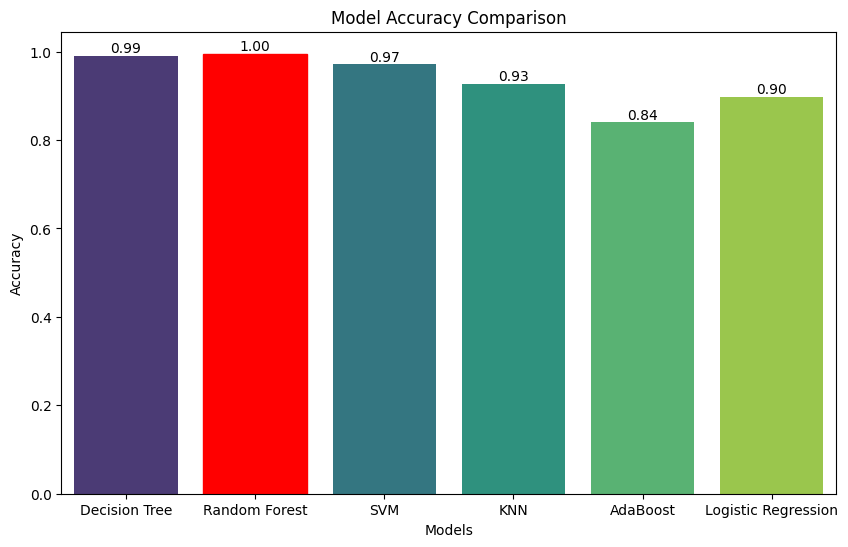

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'AdaBoost', 'Logistic Regression']
accuracy = [0.9902912621359223, 0.9951456310679612, 0.970873786407767, 0.9271844660194175, 0.8398058252427184, 0.8980582524271845]

# Create a DataFrame for better handling
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy
})

# Find the model with the highest accuracy
best_model = results.loc[results['Accuracy'].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')

# Highlight the best model
highlight = results['Model'] == best_model['Model']
for idx, rect in enumerate(plt.gca().patches):
    if highlight[idx]:
        rect.set_color('red')

# Adding text labels on bars
for idx, rect in enumerate(plt.gca().patches):
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

# Adding title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the plot
plt.show()


From the above graph we can conclude that for the specific dataset , RandomForest provides us with a high accuracy.